Preprocess altimetry data into monthly data and create time series
Jessica Besnier
June 2022

In [1]:
import netCDF4
from netCDF4 import Dataset

import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

import xarray as xr 
import rioxarray
import datetime as dt

from shapely.geometry import box, mapping
from rasterio import features
from affine import Affine
import scipy.interpolate

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import h5netcdf
import scipy  
import os


c:\Users\Jessica Besnier\anaconda3\envs\AGU_data\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [9]:
#the lakes from the hydroweb database : barra-bonita igauzu itarare
lake = 'itaipu'
ds = pd.read_csv('E:/internship 2022/data/csv_date_height/'+lake+'.csv')
ds_r = pd.read_csv('E:/internship 2022/data/raw_csv_height/'+lake+'.csv')

ds['datetime']=pd.to_datetime(ds['date'])
ds_r['datetime']= pd.to_datetime(ds_r['date'])

In [10]:
df1 = ds.resample('M', on= 'datetime').mean()
df1_r = ds_r.resample('M', on= 'datetime').mean()


Text(0, 0.5, 'Height (m)')

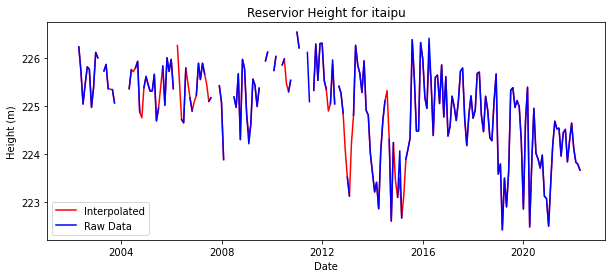

In [11]:
fig = plt.figure(figsize=(10,4))
plt.plot(df1.height, color = 'red', label= "Interpolated")
plt.plot(df1_r.height, color = 'blue', label = "Raw Data")
plt.legend (loc = "lower left")

plt.title('Reservior Height for ' +lake )
plt.xlabel('Date')
plt.ylabel('Height (m)')
#plt.ylim([327,329])


Creating Anomalies for the Lake Level Height

In [36]:
#reading in interpolated and raw csv's, creating a datetime coloumn, and resampling to monthly
lake_name = 'tres_iramos'
ds_a = pd.read_csv('E:/internship 2022/data/csv_date_height/'+lake_name+'.csv')
ds_ar = pd.read_csv('E:/internship 2022/data/raw_csv_height/'+lake_name+'.csv')

ds_a['datetime']=pd.to_datetime(ds_a['date'])
df1_a = ds_a.resample('MS', on= 'datetime').mean()

ds_ar['datetime']=pd.to_datetime(ds_a['date'])
df1_ar = ds_a.resample('MS', on= 'datetime').mean()

df1_a.to_csv('E:/internship 2022/data/csv_date_height/monthly/'+lake_name+'.csv')

In [43]:
xr = ds_ar.to_xarray()
xr.to_netcdf('data_'+lake_name+'.nc')

In [44]:
xr.head()

<xarray.Dataset>
Dimensions:   (index: 5)
Coordinates:
  * index     (index) int64 0 1 2 3 4
Data variables:
    date      (index) object '6/30/2002' '9/8/2002' ... nan '12/22/2002'
    height    (index) float64 327.2 326.1 326.5 nan 325.8
    error     (index) float64 0.271 0.033 0.374 nan 0.132
    datetime  (index) datetime64[ns] 2002-06-30 2002-09-08 ... 2002-12-22

In [47]:
climatology = xr.groupby('').mean('')


ValueError: cannot reduce over dimensions ['date']. expected either '...' to reduce over all dimensions or one or more of Frozen({'index': 1}).

In [41]:
climatology.head()

,height,error
datetime,,
2002-06-30,327.206,0.271
2002-09-08,326.079,0.033
2002-10-13,326.494,0.374
2002-11-15,326.162,NaN
2002-12-22,325.830,0.132


In [ ]:
#finding climatology for interpolated
lh = ds_a.height 

climatology = ds_a.groupby("datetime").mean("datetime")
anomaly_lh = ds_a.groupby("datetime") - climatology
anomaly_lh.to_netcdf('E:/internship 2022/data/anomalies_lh/interpolated/'+lake_name+'_anomaly')


In [ ]:
#finding climatology for raw data
lh_r = ds_ar.height 

climatology_r = lh_r.groupby("time.month").mean("time")
anomaly_lh_r = lh_r.groupby("time.month") - climatology_r
anomaly_lh_r.to_netcdf('E:/internship 2022/data/anomalies_lh/raw/'+lake_name+'_anomaly_raw')